In [2]:
import pyvista as pv
pv.set_jupyter_backend('html')

## Eigen vectors

In [60]:
import numpy as np
evecs_x = np.load('output/evecs/evecs_x.npy')
evecs_y = np.load('output/evecs/evecs_y.npy')

evecs_trans_x = np.load('output/evecs/evecs_trans_x.npy')
evecs_trans_y = np.load('output/evecs/evecs_trans_y.npy')

evals_x = np.load('output/evecs/evals_x.npy')
evals_y = np.load('output/evecs/evals_y.npy')

mass_x = np.load('output/evecs/mass_x.npy')
mass_y = np.load('output/evecs/mass_y.npy')

In [4]:
import pyvista as pv

mesh_x = pv.read('output/evecs/x.obj')

for id in range(10):
    mesh_x[f'evec {id}'] = evecs_x[:, id]
    plotter = pv.Plotter()
    plotter.add_mesh(
        mesh=mesh_x,
        scalars=f'evec {id}',
        cmap='coolwarm',
        clim=[-1, 1],
        show_scalar_bar=False,
    )
    plotter.camera_position = 'xy'
    plotter.screenshot(f'output/evecs/x_{id}.png', window_size=[1024, 1024], return_img=False)

In [5]:
mesh_y = pv.read('output/evecs/y.obj')

for id in range(10):
    mesh_y[f'evec {id}'] = evecs_y[:, id]
    plotter = pv.Plotter()
    plotter.add_mesh(
        mesh=mesh_y,
        scalars=f'evec {id}',
        cmap='coolwarm',
        clim=[-1, 1],
        show_scalar_bar=False,
    )
    plotter.camera_position = 'xy'
    plotter.screenshot(f'output/evecs/y_{id}.png', window_size=[1024, 1024], return_img=False)

## Random function

In [75]:
rand_w = np.random.rand(200)
val = (evecs_x * rand_w).sum(axis=1)
mesh_x[f'rand_func'] = val

plotter = pv.Plotter()
plotter.add_mesh(
    mesh=mesh_x,
    scalars=f'rand_func',
    cmap='coolwarm',
    show_scalar_bar=False,
)
plotter.camera_position = 'xy'
plotter.screenshot(f'output/evecs/x_rand_func.png', window_size=[1024, 1024], return_img=False)

In [76]:
val = (evecs_y * rand_w).sum(axis=1)
mesh_y[f'rand_func'] = val

plotter = pv.Plotter()
plotter.add_mesh(
    mesh=mesh_y,
    scalars=f'rand_func',
    cmap='coolwarm',
    show_scalar_bar=False,
)
plotter.camera_position = 'xy'
plotter.screenshot(f'output/evecs/y_rand_func.png', window_size=[1024, 1024], return_img=False)

## Heat diffusion

In [118]:
delta_w = evecs_x[0, :]

for diff_t in range(10):
    # heat diffusion
    diff_w = np.exp(-evals_x * diff_t) * delta_w
    val = (evecs_x * diff_w).sum(axis=1)

    mesh_x[f'diff_t={diff_t}'] = val
    plotter = pv.Plotter()
    plotter.add_mesh(
        mesh=mesh_x,
        scalars=f'diff_t={diff_t}',
        cmap='coolwarm',
        show_scalar_bar=False,
    )
    plotter.camera_position = 'xy'
    plotter.screenshot(f'output/evecs/x_diff_{diff_t}.png', window_size=[1024, 1024], return_img=False)

In [119]:
delta_w = evecs_y[0, :]

for diff_t in range(10):
    # heat diffusion
    diff_w = np.exp(-evals_y * diff_t) * delta_w
    val = (evecs_y * diff_w).sum(axis=1)

    mesh_y[f'diff_t={diff_t}'] = val
    plotter = pv.Plotter()
    plotter.add_mesh(
        mesh=mesh_y,
        scalars=f'diff_t={diff_t}',
        cmap='coolwarm',
        show_scalar_bar=False,
    )
    plotter.camera_position = 'xy'
    plotter.screenshot(f'output/evecs/y_diff_{diff_t}.png', window_size=[1024, 1024], return_img=False)

## Orthogonality

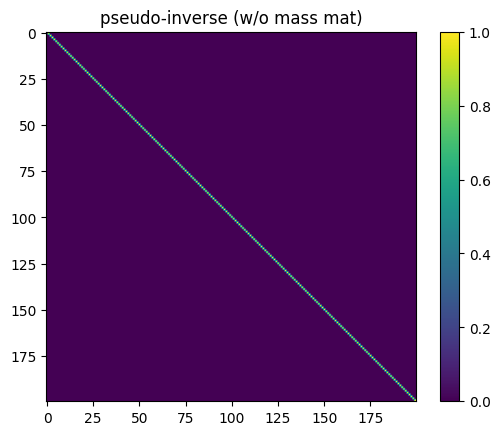

In [68]:
import matplotlib.pyplot as plt
plt.imshow(evecs_trans_x @ evecs_x)
plt.title('pseudo-inverse (w/o mass mat)')
plt.colorbar()
plt.show()

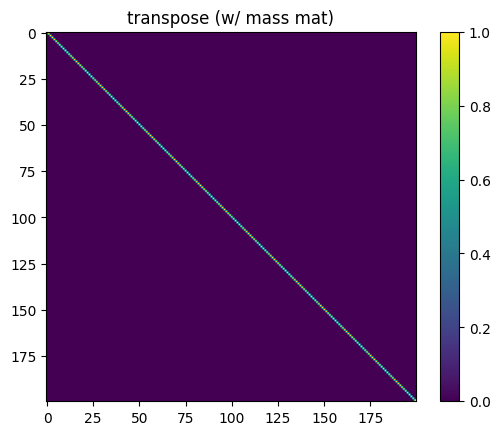

In [67]:
plt.imshow(evecs_x.T @ np.diag(mass_x) @ evecs_x)
plt.title('transpose (w/ mass mat)')
plt.colorbar()
plt.show()

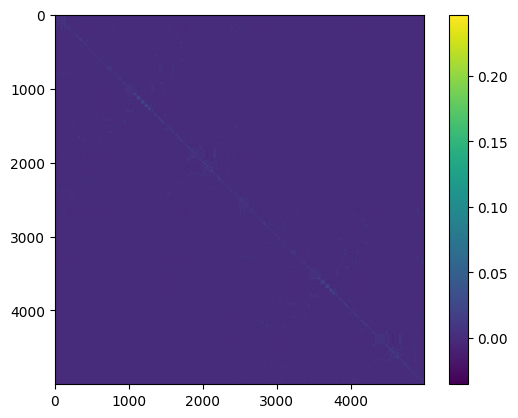

In [77]:
plt.imshow(evecs_x @ evecs_trans_x)
plt.colorbar()
plt.show()

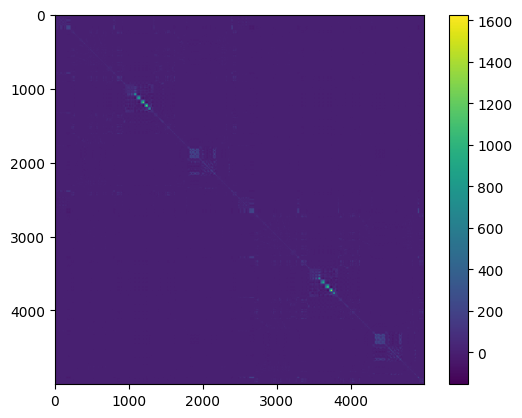

In [78]:
plt.imshow(evecs_x @ evecs_x.T)
plt.colorbar()
plt.show()